# One Sample T-Test - Lab

## Introduction

Just as we previously used the t distribution to provide confidence intervals on estimating the population mean, we can also use similar methods to test whether two populations are different, statistically speaking. To do this, we can use a t-test.

## Objectives
You will be able to:

* Perform a complete one sample t-test analysis and describe the results

* Compare the t-test and resulting p-value with Effect Size and describe both statistics and their applications

## Hypothesis testing using Frequentist methods

In frequentist hypothesis testing, we construct a test statistic from the measured data, and use the value of that statistic to decide whether to accept or reject the hypothesis. 
The test statistic is a lower dimensional summary of the data but still maintains the discriminatory power

Frequentist methods lend themselves well to the concepts of experimental design. Most commonly-used frequentist hypothesis tests involve elements of model assumption, Null and Alternate Hypotheses, A test statistic the outcome in form of a theorem. 

[Here](https://hackaday.com/2017/12/01/statistics-and-hacking-an-introduction-to-hypothesis-testing/) is an excellent introduction to hypothesis testing. 

### Significance Levels (Alpha)

The significance level, also denoted as alpha or `α`, is the probability of rejecting the null hypothesis when it is true. For example, a significance level of 0.05 indicates a 5% risk of concluding that a difference exists when there is no actual difference. Look at following graphs for a better understanding: 


<img src="P05.png" alt="drawing" width="500px"/>
In the graph above, the two shaded areas are equidistant from the null hypothesis value and each area has a probability of 0.025, for a total of 0.05. In statistics, we call these shaded areas the critical region for a two-tailed test. If the population mean is 260, we’d expect to obtain a sample mean that falls in the critical region 5% of the time. The critical region defines how far away our sample statistic must be from the null hypothesis value before we can say it is unusual enough to reject the null hypothesis.

Our sample mean (330.6) falls within the critical region, which indicates it is statistically significant at the 0.05 level.

We can also see if it is statistically significant using the other common significance level of 0.01.


<img src="P01.png" alt="drawing" width="500px"/>

The two shaded areas each have a probability of 0.005, which adds up to a total probability of 0.01. This time our sample mean does not fall within the critical region and we fail to reject the null hypothesis. This comparison shows why you need to choose your significance level before you begin your study. It protects you from choosing a significance level because it conveniently gives you significant results!

Thanks to the graph, we were able to determine that our results are statistically significant at the 0.05 level without using a P value. However, when you use the numeric output produced by statistical software, you’ll need to compare the P value to your significance level to make this determination.


### P values: 
P-values are the probability of obtaining an effect at least as extreme as the one in your sample data, assuming the truth of the null hypothesis. Lets look at following graph for a better understanding.

<img src="p.png" alt="drawing" width="500px"/>

To graph the P value, we need to determine the distance between the sample mean and the null hypothesis value (330.6 - 260 = 70.6). Next, we can graph the probability of obtaining a sample mean that is at least as extreme in both tails of the distribution (260 +/- 70.6).

In the graph above, the two shaded areas each have a probability of 0.01556, for a total probability 0.03112. This probability represents the likelihood of obtaining a sample mean that is at least as extreme as our sample mean in both tails of the distribution if the population mean is 260. That’s our P value!

When a P value is less than or equal to the significance level, you reject the null hypothesis. If we take the P value for our example and compare it to the common significance levels, it matches the previous graphical results. The P value of 0.03112 is statistically significant at an alpha level of 0.05, but not at the 0.01 level.

If we stick to a significance level of 0.05, we can conclude that the average energy cost for the population is greater than 260.

[Here's](https://www.khanacademy.org/math/ap-statistics/tests-significance-ap/idea-significance-tests/v/p-values-and-significance-tests) a video that explains this idea in detail. 

## t-test
The t-tests (also called Student’s t-test) are very practical hypotheses tests that can be employed to compare two averages (means) to know if they are different from each other. The t test also tells you how significant the differences are i.e. it lets you know if those differences could have happened by chance. In this lesson, you shall get an introduction to T-tests, in particular "One Sample T-test". There are different kinds of T-tests including 1-sample t, 2-sample t and paired t. This lesson will show you the calculation behind a 1-sample t-test and how to perform t-test in Python using NumPy and SciPy. 

Detailed descriptions of hypothesis testing with t-tests can be found [here](http://www.mas.ncl.ac.uk/~njnsm/medfac/docs/ttest) and [here](http://blog.minitab.com/blog/adventures-in-statistics-2/understanding-t-tests-t-values-and-t-distributions)



### One Sample t-test

The one sample t-test is a statistical procedure used to determine whether a sample of observations could have been generated by a process with a specific mean. The one sample t test compares the mean of your sample data to a known value. For example, you might want to know how your sample mean compares to the population mean. You should run a one sample t test when you don’t know the population standard deviation or you have a small sample size, which is mostly the case with routine data analysis tasks. Here is a quick example of a scenario where 1 sample t test could be applied. 

*Suppose you are interested in determining whether a bakery production line produces cakes with the weight of exactly 2 pounds. To test this hypothesis, you could collect a sample of cakes from the production line, measure their weights, and compare the sample with a value of 2 using a one-sample t-test.* 

We will discuss this process in detail in the following description. First we must ensure that our experiment settings meet the neccesary pre-requisites for conducting the t-test as given below:

### Assumptions for the test (your data should meet these requirements for the test to be valid):

* **Data is independent**

Independence means the value of one observation does not influence or affect the value of other observations. Independent data items are not connected with one another in any way (unless you account for it in your model). This includes the observations in both the “between” and “within” groups in your sample. Non-independent observations introduce bias and can make your statistical test give too many false positives.  

* **Data is collected randomly** 

A sample is random when each data point in your population has an equal chance of being included in the sample; therefore selection of any individual happens by chance, rather than by choice. This reduces the chance that differences in materials or conditions strongly bias results. Random samples are more likely to be representative of the population; therefore you can be more confident with your statistical inferences with a random sample. 

* **The data is approximately normally distributed**

A normal distribution assumptions is that the sampling distribution of the mean is normal. That is, if you took a sample, calculated its mean, and wrote this down; then took another (independent) sample (from the same population) and got its mean and wrote it down; and did this an infinite number of times; then the distribution of the values that you wrote down would always be a perfect bell curve. While maybe surprising, this assumption turns out to be relatively uncontroversial, at least when each of the samples is large, such as N ≥ 30. 

Lets look at a sample analytical question and work through the process of calculating the significance of results. 

### Sample question: 

>** *"Acme Ltd. wants to improve sales performance. Past sales data indicate that the average sale was 100 dollars per transaction. After training the sales force, recent sales data (from a random sample of 25 salesmen) is shown below:"* **

       
      [122.09, 100.64, 125.77, 120.32, 118.25,
       96.47 , 111.4 ,  80.66, 110.77, 111.14, 
       102.9 , 114.54,  88.09,  98.59,  87.07, 
       110.43, 101.9 , 123.89,  97.03, 116.23, 
       108.3 , 112.82, 119.57, 131.38, 128.39]

> **Did the training work? Test your hypothesis at a 5% alpha level.**




### Step 1: Write your null hypothesis statement

As we are trying to monitor a change in the sales performance after the training, the null-hypothesis addresses the fact that there is no change and sales performance before and after the training is exactly the same. 

**H0: *The null hypothesis is that there is no difference in sales, so:* **

> H0: μ = $100.


### Step 2: Write your alternate hypothesis. 
    
This is the one that we are testing. Our alternate hypothesis should address the expected change in the sales performance i.e. the sales performance has increased and the mean of sales post-training is greater than 100. 

**H1: *The alternative hypothesis is that there is a change i.e. the mean sales increased.* **

> H1: μ > $100.

### Step 3: Import necessary librararies and calculate sample statistics:

In order to show a significant increase in the sales performance, we need to calculate following values:

* **The population mean (μ).** Given as 100 (from past data).
* **The sample mean (x̄).** Calculate from the sample data
* **The sample standard deviation (sigma).** Calculate from sample data
* **Number of observations(n).** 25 as given in the question. This can also be calculated form the sample data.
* **Degrees of Freedom(df).** Calculate from the sample as df = total no. of observations - 1


In [1]:
## Import the packages
import numpy as np
from scipy import stats 
import math

# For visualizing distributions - optional 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

Identify the pieces of information you’ll need to calculate the test statistic as given above. The sample data should provide you with required values.

In [8]:
# Read the sales data into NumPy array. Alternatively, you can also read this data into a Pandas dataframe
sample =  [122.09, 100.64, 125.77, 120.32, 118.25,
       96.47 , 111.4 ,  80.66, 110.77, 111.14, 
       102.9 , 114.54,  88.09,  98.59,  87.07, 
       110.43, 101.9 , 123.89,  97.03, 116.23, 
       108.3 , 112.82, 119.57, 131.38, 128.39]

# Population mean (μ)
mu = 100

# Sample mean (x̄) using NumPy mean()
x_bar= np.mean(sample)

# Sample Stadrad Deviation (sigma) using Numpy
sigma = np.std(sample)

# Sample size (n)
n = 25

# Degrees of Freedom
df = n-1

# Difference in sample mean 
diff = x_bar - mu


# Print the findings
print(f"The sample contains {n} observations, having a mean of {x_bar}")
print(f"and a standard deviation (sigma) = {round(sigma, 2)},")
print(f"with {df} degrees of freedom.")
print(f"The difference between sample and population means is: {round(diff,2)}")

# The sample contains 25 observations, having a mean of 109.5456 
# and a standard deviation (sigma) =  13.069276668584225 , 
# with 24 degrees of freedom. 
# The difference between sample and population means is: 9.54

The sample contains 25 observations, having a mean of 109.5456
and a standard deviation (sigma) = 13.07,
with 24 degrees of freedom.
The difference between sample and population means is: 9.55


9.5 mean difference with a positive sign shows an increase in sample mean. 



Let's also try drawing a distribution from example values to check for normality. 

C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


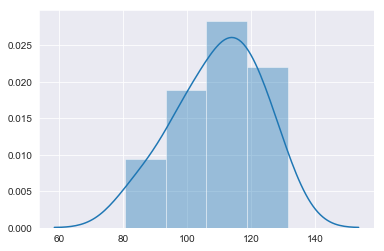

In [11]:
sns.set_style('darkgrid')
sns.distplot(sample);

At this point, we have some idea of difference between our sample and the population mean. To review, we have a null hypothesis that states there's no increase in sales performance, and an alternate hypothesis that states that there is an increase in sales performance - post training.

Our first step for stating these findings would be to assume that our null hypothesis is true. That means our sample and population are the same. What we want to know is, given that our null hypothesis is true, how rare is the data we're seeing?

We're going to solve this problem by two methods, and you'll see that they agree.

### Step 4: Calculate the t value from given data

Our sample looks like a nicely shaped normal distribution. After fulfilling the three requirements for a t-test mentioned above i.e. normality, independance and randomness, we are ready to calculate our t value using the fomula for one-sample t-test given as:

 ![formula](t-score.jpg)
 
Where $S$ stands for standard deviation, which we already defined as 'sigma'. 
> **Exercise:** Using the formula given above,calculate the t-value in Python:

In [13]:
# Calculate Sigma
t = (x_bar - mu) / (sigma/np.sqrt(n))
t
# 3.578139767278185

3.6519236075802097

> Note that a positive t value indicates that the sample mean is greater than population mean and vice versa. This means that sample's average sales performnace post-training is greater than average population sales performance. 

This sounds like good news, **BUT** is the increase high enough to reject the null hypothesis and accept that there is a significant increase in the mean of post training sales perfromance, or is it just by chance. Lets have a look at the t-distribution table to calculate our critical t_value, also, how to calculate the critical t value in python. 

Lets try visualizing the calculated t-statistic with a PDF.

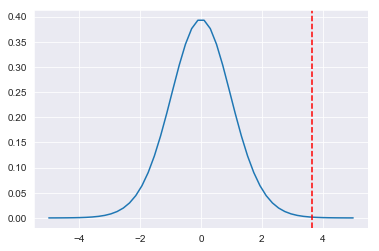

In [27]:
# generate points on the x axis between -5 and 5:
xs = np.linspace(-5,5)
# use stats.t.pdf to get values on the probability density function for the t-distribution
# the second argument is the degrees of freedom
ys = stats.t.pdf(xs, df)
# initialize a matplotlib "figure"
fig = plt.figure

# get the current "axis" out of the figure
ax = plt.subplot()

# plot the lines using matplotlib's plot function:
plt.plot(xs,ys)

# plot a vertical line for our measured difference in rates t-statistic
ax.axvline(t, color='red', linestyle='dashed');

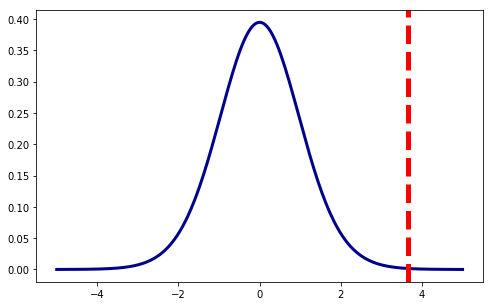

### Step 5: Find the critical t value. 


The critical value approach involves determining "likely" or "unlikely", by determining whether or not the observed test statistic is more extreme than would be expected if the null hypothesis were true. This involves comparing the observed test statistic to some cutoff value, called the **"critical value"**. 
>If the test statistic is more extreme than the critical value, then the null hypothesis is rejected in favor of the alternative hypothesis. If the test statistic is not as extreme as the critical value, then the null hypothesis is not rejected.


You need two values to find this:

The **alpha level**: given as 5% in the question.

**Degrees of freedom**, which is the number of items in the sample (n) minus 1: 25 – 1 = 24.

![t-dist](t-dist.png)

We use a one-tailed t-test towards the positive (right side of the t-distribution) to identify increase in the sales performance. 

Look up 24 degrees of freedom in the left column and p value of 0.05 (from 5% alpha level - 95% confidence level) in the top row. The intersection is `1.711`. This is our one-sample critical t-value.

For the Null hypothesis to be true, what this critical value means is that we would expect most values to fall under 1.711. If our calculated t-value (from Step 4) falls within this range, the null hypothesis is likely true.

This value can also be calculated in Python using Scipy.stats module using ppf() (Percent Point Function) as `scipy.stats.t.ppf(1-alpha, df)`. 

Ley's calculate the critical t using this formula and confirm our earlier findings. 

In [58]:
# Calculate critical t value
t_crit = round(stats.t.ppf(0.95, df),3)
t_crit
# 1.711

1.711

As we can see , the critical value returned from the function (rounded off 3 two decimal places) is same as one we found the in t-distribution table i.e. 1.711. 

Using the the [t-distribution calculator](http://www.statdistributions.com/t/), and providing the set p-value, t-value and identifying the type of t-test, we get following graph:

![t_graph](t_graph.png)


### Step 6:
>Compare t-value with critical t-value to accept or reject the Null hypothesis.

Any t value which is greater than 1.711 will fall into the shaded region in above figure. t-values greater than 1.711 would reflect an "extreme" result and can be used to reject the null hypothesis. 

Our calculated t-value i.e. 3.65 is greater than 1.711 and hence our results can be called "statistically significant" and will allow us to reject Null hypothesis and with 95% confidence state that: 

*We are 95% sure that the mean sales performance post training is higher than population mean prior to training.*

**NOTE:** This calculation can also be performed using `ttest_1samp`  function in `SciPy.stats` package using following arguments:


We can calculate the T-test for the mean of ONE group of scores using scipy as:

>**scipy.stats.ttest_1samp(a, popmean, axis=0, nan_policy='propagate')**

Where a is the sample mean (x_bar) and popmean (mu) is the population mean. This function resturns the t-value and p-value for the sample. 

We use a one-tailed t-test as we are looking for an increase in the sales performance. The right tail of the di test for the null hypothesis that the expected value (mean) of a sample of independent observations a is equal to the given population mean, popmean.

In [41]:
results = stats.ttest_1samp(sample, mu)
print(f"The t-value for the sample is {round(results[0],2)} and the p-value is {round(results[1],4)}")
#  Print results
# The t-value for sample is 3.58 and the p-value is 0.0015

The t-value for the sample is 3.58 and the p-value is 0.0015


We can use our null and alternate hypothesis defined earlier to state the results from our findings using if-else conditions to reject Ho/Ha. 

In [46]:
t_val = round(results[0],2)
p_val = round(results[1],4)
alpha = 0.95
if t_val>t_crit and p_val<alpha:
    print(f"Null hypothesis rejected. Results are statistically significant with t-value {t_val} and p-value {p_val}")
else:
    print("Null hypothesis accepted")

# Null hypothesis rejected. Results are statistically significant with 
# t-value = 3.58 and p-value = 0.0015

Null hypothesis rejected. Results are statistically significant with t-value 3.58 and p-value 0.0015


## Effect Size Calculation for one-sample t-test

The standard effect size (Cohen's d) for a one-sample t-test is the difference between the sample mean and the null value in units of the sample standard deviation:

>**d = x̄ - μ / sigma**


With a test statistic / p-value you get a sense of the confidence you have in your result, **but these conflate the size with N**, so from a small p you don't know if you have a big effect with a small N or a small effect with a big N. Here, you would get a point estimate of the magnitude of the shift, but you don't know from d=.5 whether or not you can be confident that the true effect isn't 0.

Lets calculate the Cohen'd for our sample using the formula above:


In [47]:
# Calculate Cohen's d and round off 
d = round(diff/sigma,2)
d
# 0.73

0.73


Following cohen's interpretation, we can confidently say that the sample mean shifts considerably towards positive side as compared to the population means, resulting in a large effect size. This also help us conclude that training has a a clear effect on the sales performance of the sales team, when compared to pre-sales performance. 


### Exercise 1: 

Create a function in python `one_sample_ttest(sample, popmean, alpha)` that will take in a sample data(as the one given above),  the population mean and the alpha value to calculate and return the t-value, critical t-value and p-value for the sample and identify if the results are significant or not. 

In [66]:
def one_sample_ttest(sample, popmean, alpha):

    # Visualize sample distribution for normality 
    sns.distplot(sample);
    
    # Population mean
    mu = popmean

    # Sample mean (x̄) using NumPy mean()
    x_bar = np.mean(sample)

    # Sample Stadrad Deviation (sigma) using Numpy
    sigma = np.std(sample)
    
    # Degrees of freedom
    df = len(sample) - 1
    
    #Calculate the critical t-value
    t_crit = stats.t.ppf((1-alpha), df)
    
    #Calculate the t-value and p-value 
    t_val, p_val = stats.ttest_1samp(sample, mu)
    
    #return results
    return t_val, t_crit, p_val

### Exercise 2:

Use the function created in exercise 1 to conduct following analytical question.

In a Python class, some of the students have taken online courses to improve their Python skills.
The scores of a random sample of 20 students who underwent the online- course, on a Python test are as follows: 

     [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
      78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]

The mean score of the class before the test is 65. The teacher thinks that the on-line training has really helped the students and now they should perform better than the class (population) mean. Use this to set your Null and Alternate hypothesis.

1. Test to see if the sample mean is significantly different from 65 at the .05 level. Report the t and p values.
2. The researcher realizes that she accidentally recorded the score that should have been 80.9 as 90.9. Are these corrected scores significantly different from 65 at the .05 level?

Null hypothesis rejected. Results are statistically significant with t-value = 12.69, critical t-value = 1.73, and p-value = 0.0


C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


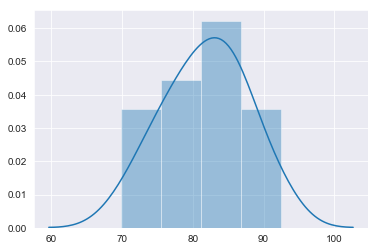

In [69]:
sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 90.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
popmean = 65
alpha = 0.05
t_val, t_critical, p_val = one_sample_ttest(sample, popmean, alpha)

if t_val>t_crit and p_val<alpha:
    print(f"Null hypothesis rejected. Results are statistically significant with t-value = {round(t_val,2)}, critical t-value = {round(t_critical,2)}, and p-value = {round(p_val,2)}")
else:
    print("Null hypothesis accepted")

Null hypothesis rejected. Results are statistically significant with t-value = 13.2, critical t-value = 1.73, and p-value = 0.0


C:\Users\Laura\Anaconda3\envs\learn-env\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


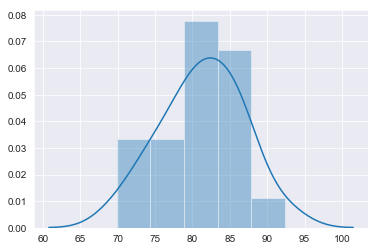

In [73]:
sample = [84.0, 92.4, 74.3, 79.4, 86.7, 75.3, 80.9, 86.1, 81.0, 85.1, 
  78.7, 73.5, 86.9, 87.4, 82.7, 81.9, 69.9, 77.2, 79.3, 83.3]
popmean = 65
alpha = 0.05
t_val, t_critical, p_val = one_sample_ttest(sample, popmean, alpha)

if t_val>t_crit and p_val<alpha:
    print(f"Null hypothesis rejected. Results are statistically significant with t-value = {round(t_val,2)}, critical t-value = {round(t_critical,2)}, and p-value = {round(p_val,2)}")
else:
    print("Null hypothesis accepted")

The t-value is slightly different, but no change in significance.

### Solution 1:

Null hypothesis rejected. Results are statistically significant with t-value = 12.69 critical t-value = 3.579400148163749 and p-value = 1e-10


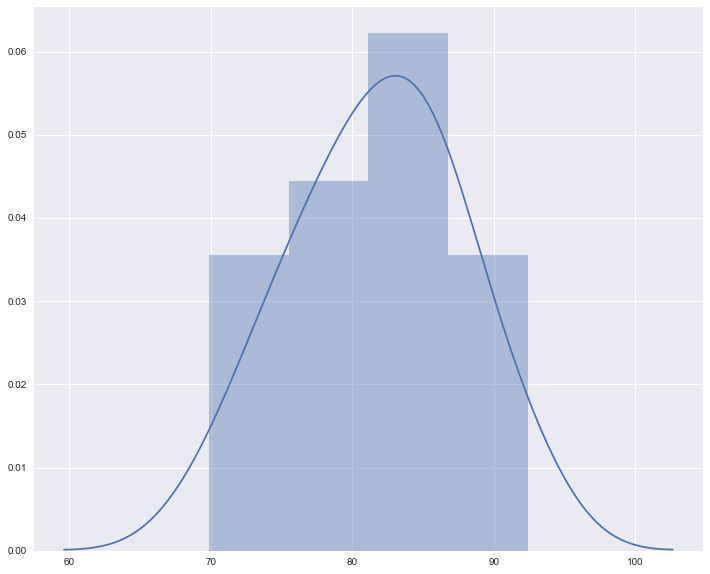

### Solution 2:

Null hypothesis rejected. Results are statistically significant with t-value = 13.2 critical t-value = 1.729132811521367 and p-value = 1e-10


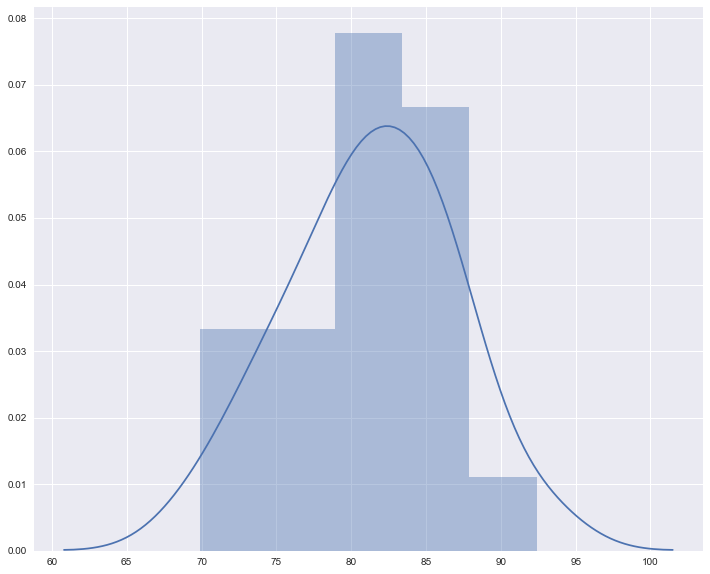

## Summary

In this lesson, we saw a quick introduction to hypothesis testing using frequestists methods with t-values and p-values. We saw how a one sample t-test can be applied to contexts where the population mean is unkown and we have limited amount of sample data. We looked at all the stages required for such hypothesis testing with a description of steps and also, how to perform these functions in Python. The lesson also brielfy explains the comparison of using p-value for statistical signifiance vs. effect sizes. 

